## Install facenet

In [ ]:
!pip install facenet-pytorch

## Download the pictures

In [5]:
import requests

def get_img(url, img_path):
  req = requests.get(url, stream=True)
  with open(img_path, "wb") as f:
    for chunk in req.iter_content():
      f.write(chunk)

get_img('https://cdn.britannica.com/67/215267-050-4487C49F/American-actor-Adam-Driver-2020.jpg', 'img1.jpg')
get_img('https://cdn.britannica.com/11/215011-050-3127A07E/American-actor-Keanu-Reeves-2014.jpg','img2.jpg')
get_img('https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Reuni%C3%A3o_com_o_ator_norte-americano_Keanu_Reeves_%2846806576944%29_%28cropped%29.jpg/800px-Reuni%C3%A3o_com_o_ator_norte-americano_Keanu_Reeves_%2846806576944%29_%28cropped%29.jpg','img3.jpg')

import PIL
def img2np(img_path, width=None, height=None):
  img = PIL.Image.open(img_path)
  if(width and height):
    img = img.resize((width,height))
  return img


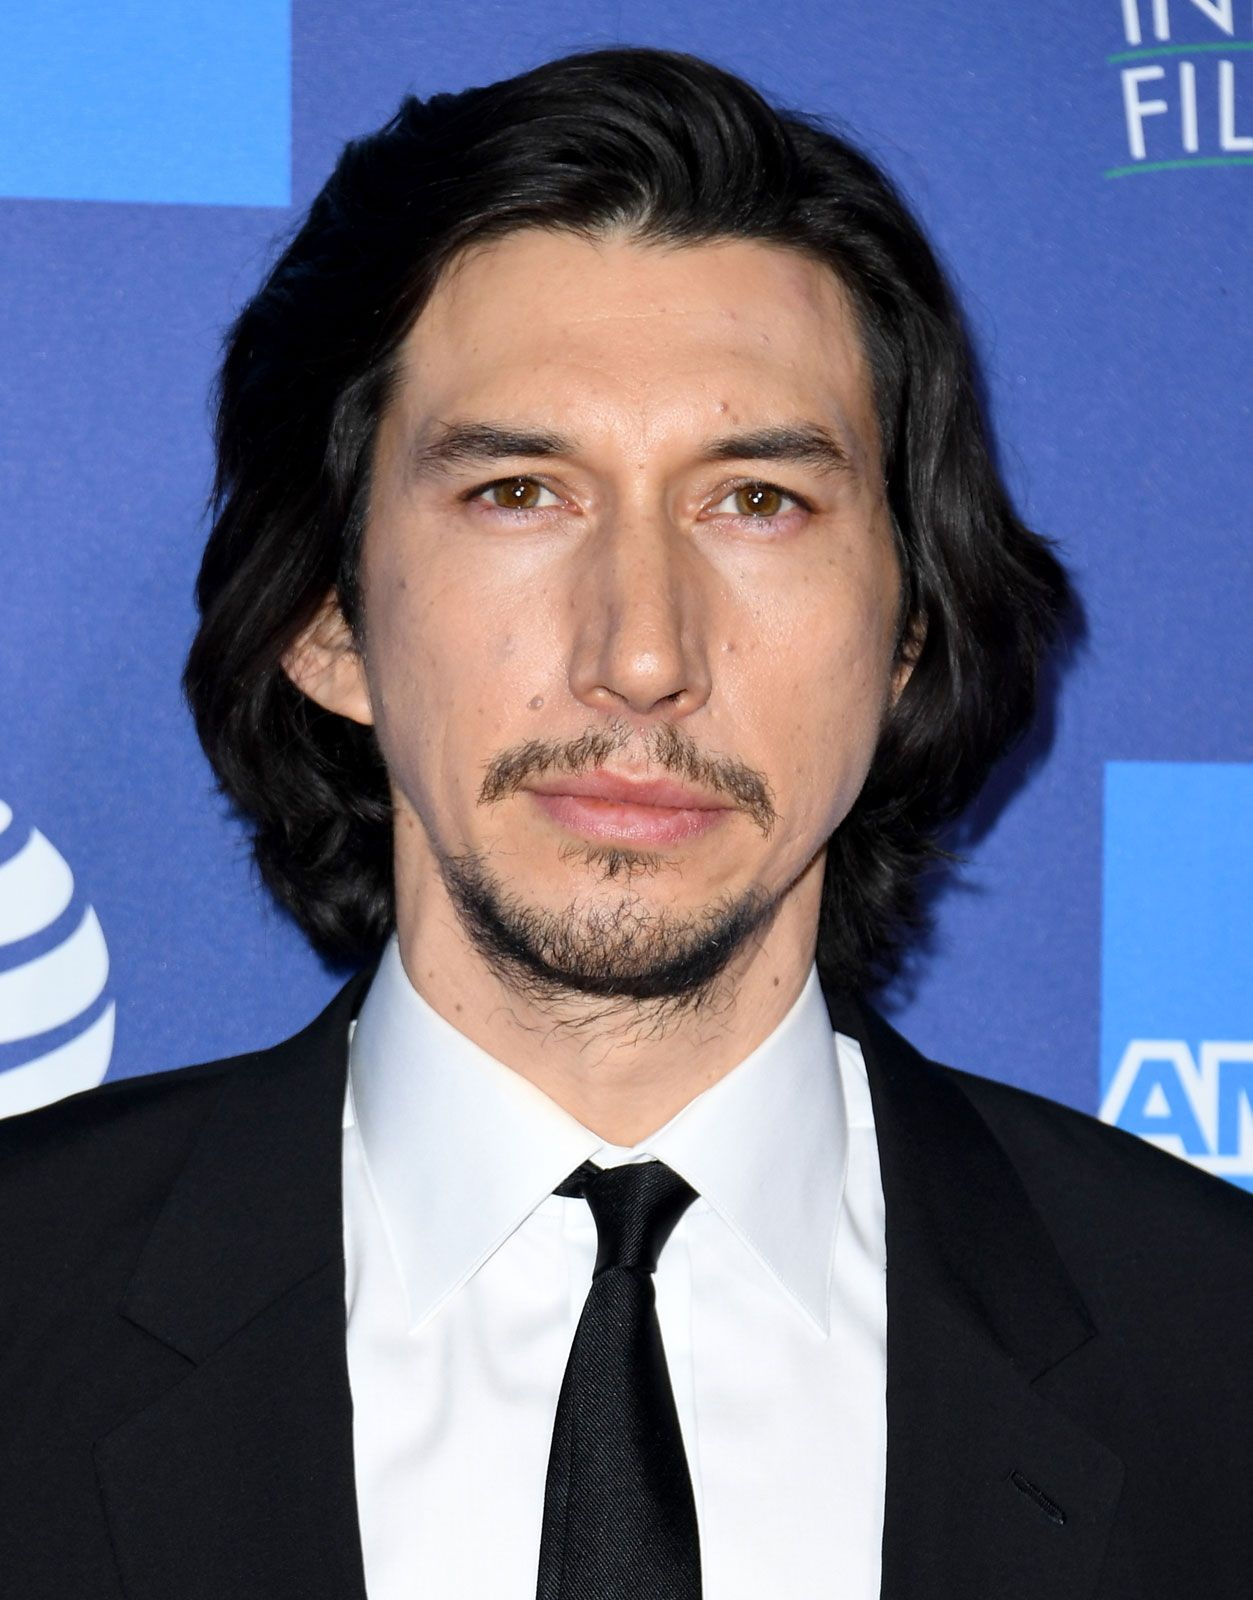

In [6]:
# img1 = img2np('img1.jpg', 800, 1100)
img1 = img2np('img1.jpg')
img1

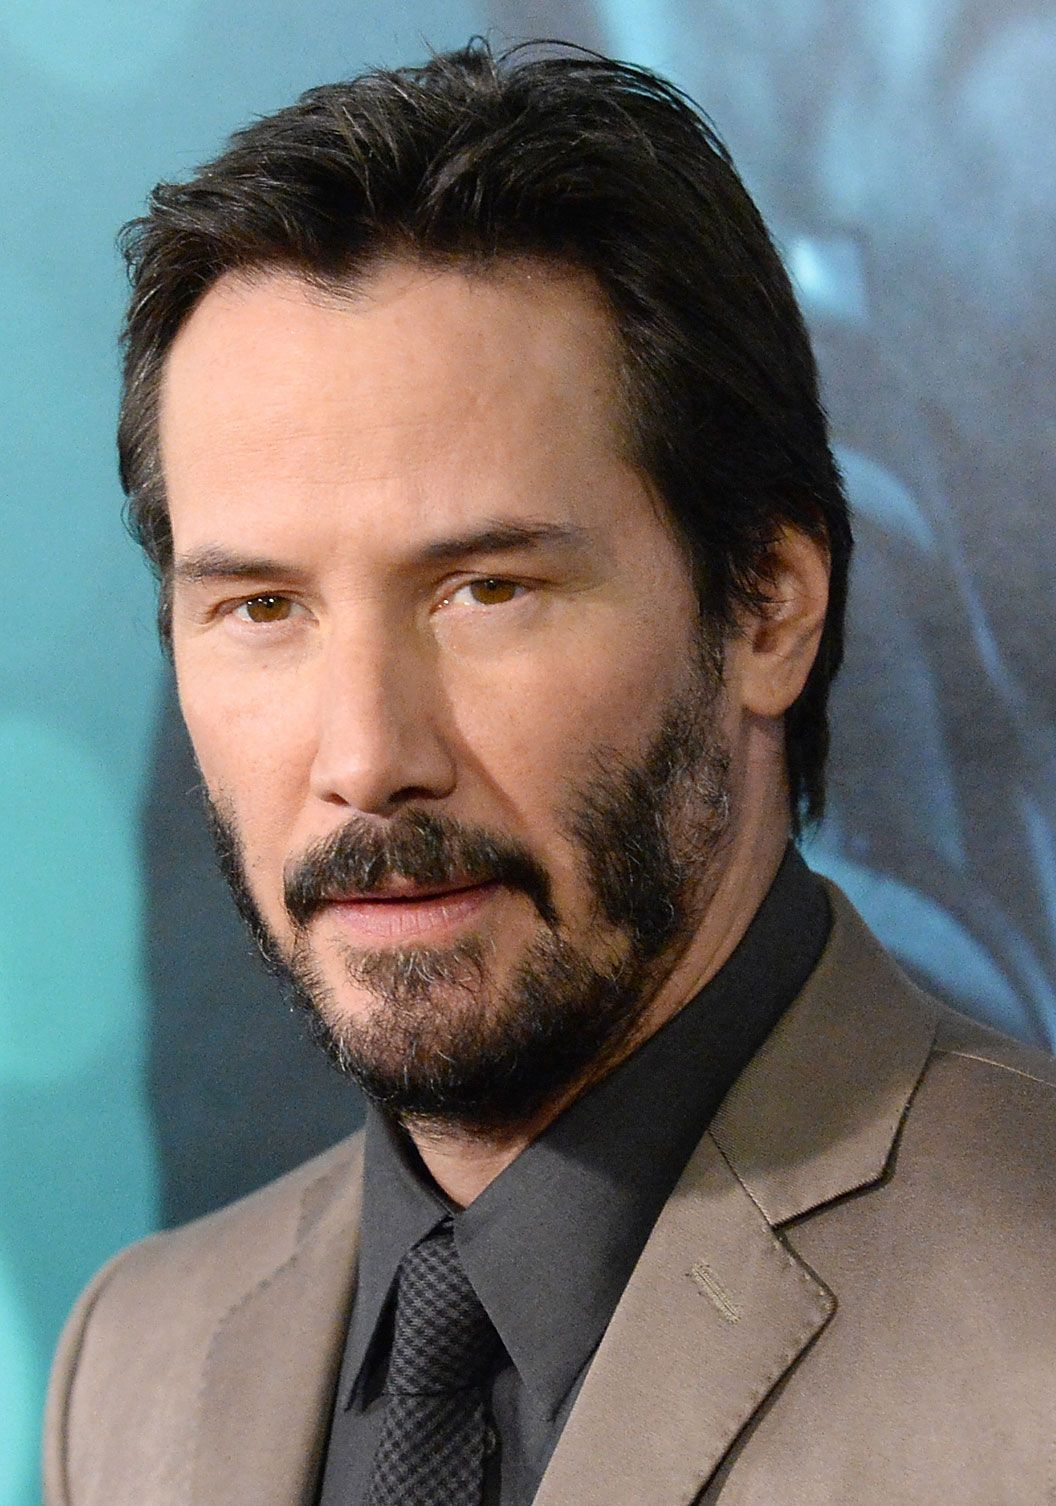

In [7]:
# img2 = img2np('img2.jpg', 800, 1100)
img2 = img2np('img2.jpg')
img2

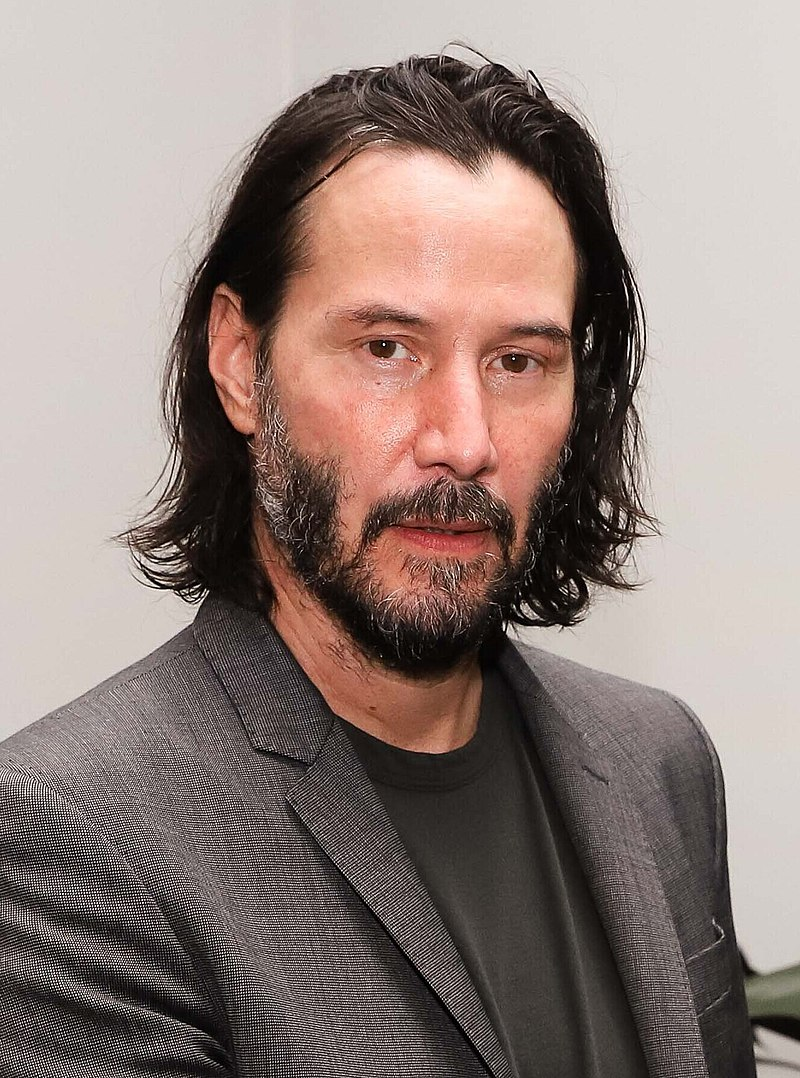

In [8]:
# img3 = img2np('img3.jpg', 800, 1100)
img3 = img2np('img3.jpg')
img3

## Import the model

In [9]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN()

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()


  0%|          | 0.00/107M [00:00<?, ?B/s]

## calculate the faceid of three picture and their euclidean metric

In [10]:
# Get cropped and prewhitened image tensor
img_cropped1 = mtcnn(img1)
img_cropped2 = mtcnn(img2)
img_cropped3 = mtcnn(img3)

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding1 = resnet(img_cropped1.unsqueeze(0))
img_embedding2 = resnet(img_cropped2.unsqueeze(0))
img_embedding3 = resnet(img_cropped3.unsqueeze(0))

import torch.nn.functional as F
dist1 = F.pairwise_distance(img_embedding1, img_embedding2, p=2)
dist2 = F.pairwise_distance(img_embedding2, img_embedding3, p=2)
dist3 = F.pairwise_distance(img_embedding1, img_embedding3, p=2)

# We suppose dist1≈dist3 > dist2
print(dist1)
print(dist2)
print(dist3)

tensor([1.1385], grad_fn=<NormBackward1>)
tensor([0.5989], grad_fn=<NormBackward1>)
tensor([1.1403], grad_fn=<NormBackward1>)


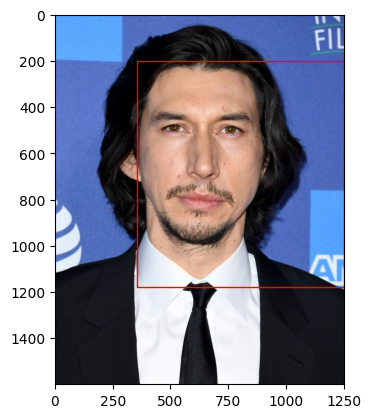

In [19]:
from matplotlib import pyplot as plt

face1 = mtcnn.detect(img1)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((face1[0][0][0], face1[0][0][1]), face1[0][0][2], face1[0][0][3], fill=False, edgecolor='red', linewidth=1)
ax.add_patch(rect)
plt.imshow(img1)
plt.show()

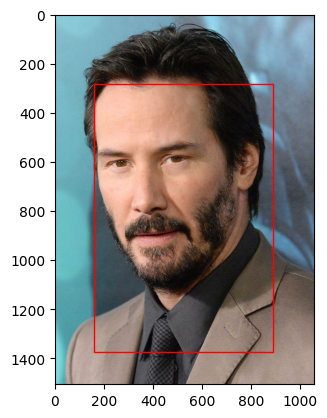

In [21]:
face2 = mtcnn.detect(img2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((face2[0][0][0], face2[0][0][1]), face2[0][0][2], face2[0][0][3], fill=False, edgecolor='red', linewidth=1)
ax.add_patch(rect)
plt.imshow(img2)
plt.show()

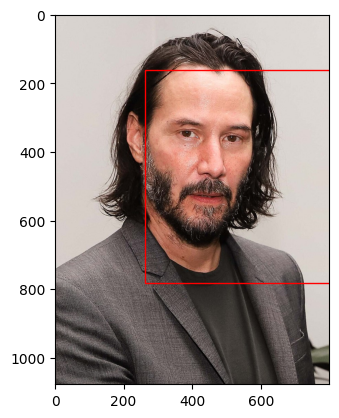

In [22]:
face3 = mtcnn.detect(img3)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((face3[0][0][0], face3[0][0][1]), face3[0][0][2], face3[0][0][3], fill=False, edgecolor='red', linewidth=1)
ax.add_patch(rect)
plt.imshow(img3)
plt.show()